# Pythonによる時系列分析の基礎

In [61]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline
sns.set()

#グラフを横長にする
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 6

#統計モデル
import statsmodels.api as sm

In [62]:
#データの読み込み
dataNormal = pd.read_csv('csv/AirPassengers.csv')
dataNormal.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [63]:
from datetime import datetime
#データセットの一列目をインデックスにし、index:日付オブジェクト, passenger:int -> floatに変更

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('csv/AirPassengers.csv', index_col='Month', date_parser=dataparse, dtype='float')

/tmp/ipykernel_112/2678836513.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('csv/AirPassengers.csv', index_col='Month', date_parser=dataparse, dtype='float')


In [33]:
data.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [68]:
#一列だけのデータなのでdfで持つのではなくpassengerのSeriesとして抽出する
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

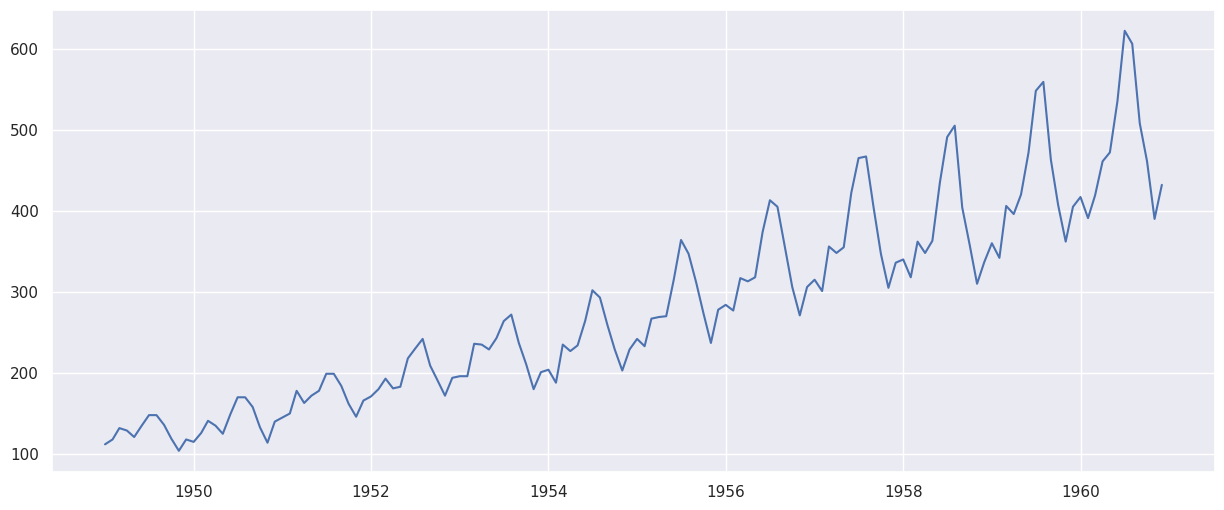

In [37]:
plt.plot(ts)

In [40]:
"""
特定の年月のデータを取得
"""

#その１
ts['1949-01-01']

#その2
ts[datetime(1949,1,1)]

# 1949年のデータをすべて取ってくる -------> 日付オブジェクトだから！！！！
ts['1949']

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
Name: #Passengers, dtype: float64

In [41]:
#シフト演算

#一つズレる
ts.shift()

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: #Passengers, Length: 144, dtype: float64

In [42]:
#差分
diff = ts - ts.shift()
diff

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64

In [46]:
#シフト演算はこっちの方が簡単
ts.diff()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64

In [48]:
#通常の差分は対数化する
logDiff = np.log(ts) - np.log(ts.shift())

In [52]:
logDiff
logDiff.dropna()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 143, dtype: float64

## 自己相関係数の推定

In [56]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
ts_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [58]:
#偏自己相関
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

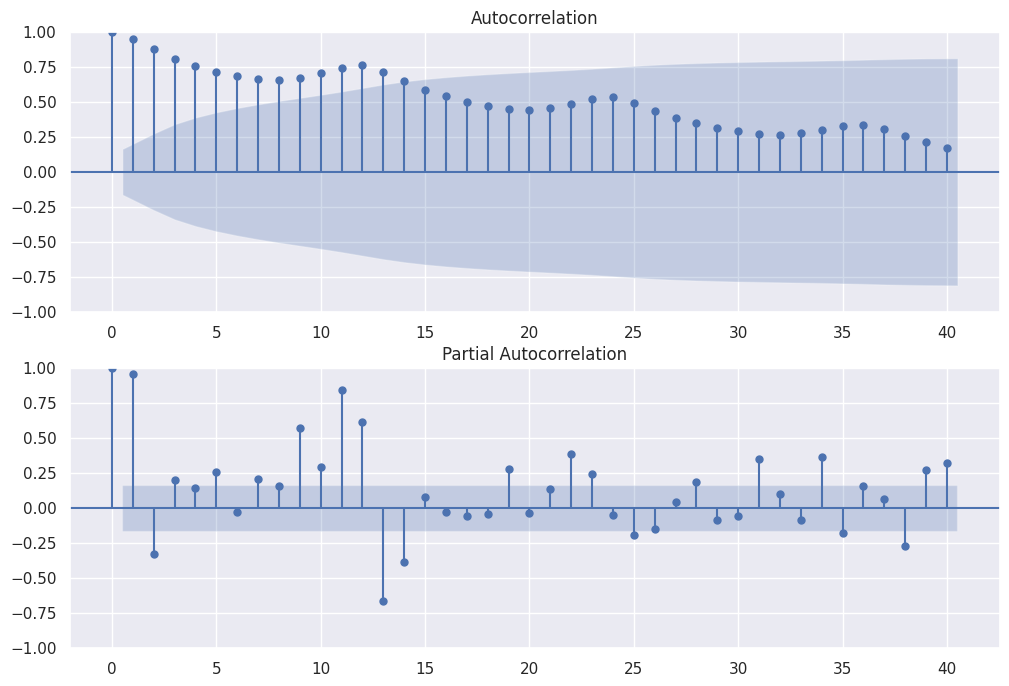

In [71]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2, method='ols')

# SARIMAモデルの推定

In [72]:
"""
order = (3, 1, 2)
3:AR(自己回帰)の次数
1:差分
2:移動平均

"""


#モデルの作成
SARIMA_3_1_2_111 = sm.tsa.SARIMAX(ts, order=(3, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
print(SARIMA_3_1_2_111.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52292D+00    |proj g|=  9.09540D-02

At iterate    5    f=  3.51620D+00    |proj g|=  1.80441D-02

At iterate   10    f=  3.50141D+00    |proj g|=  1.24951D-02

At iterate   15    f=  3.49983D+00    |proj g|=  2.12860D-02

At iterate   20    f=  3.49417D+00    |proj g|=  4.98017D-03

At iterate   25    f=  3.49351D+00    |proj g|=  1.22191D-03

At iterate   30    f=  3.49346D+00    |proj g|=  2.13408D-03

At iterate   35    f=  3.49329D+00    |proj g|=  5.52905D-04

At iterate   40    f=  3.49317D+00    |proj g|=  2.94803D-03

At iterate   45    f=  3.49288D+00    |proj g|=  1.20118D-03

At iterate   50    f=  3.49282D+00    |proj g|=  4.79246D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


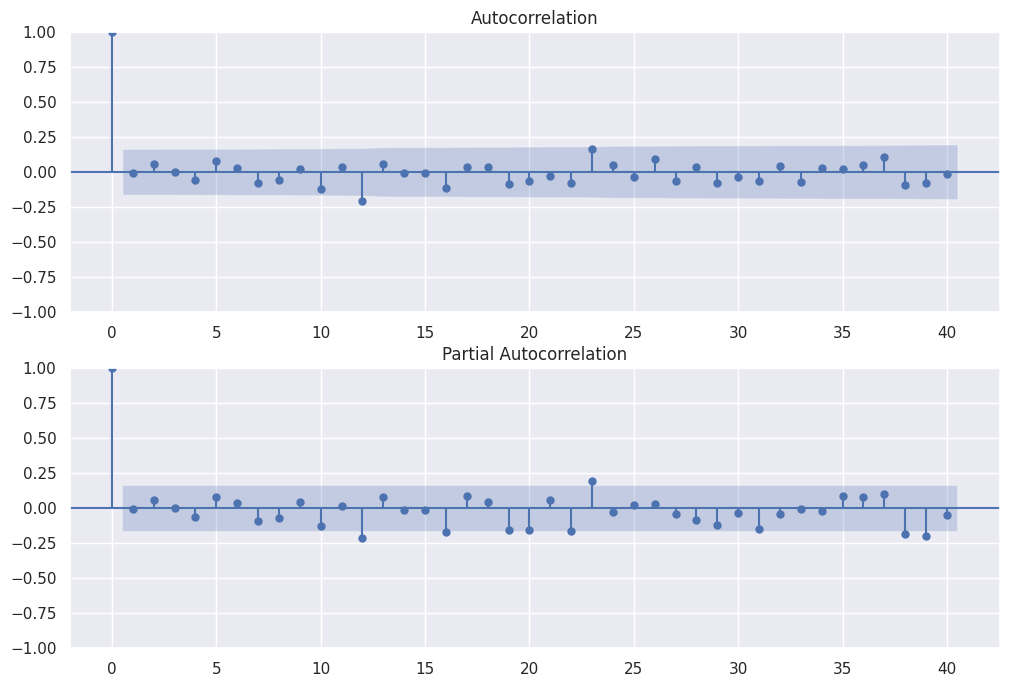

In [73]:
# 残差のチェック

"""
残差なので相関性がない方が良い

"""
residSARIMA = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

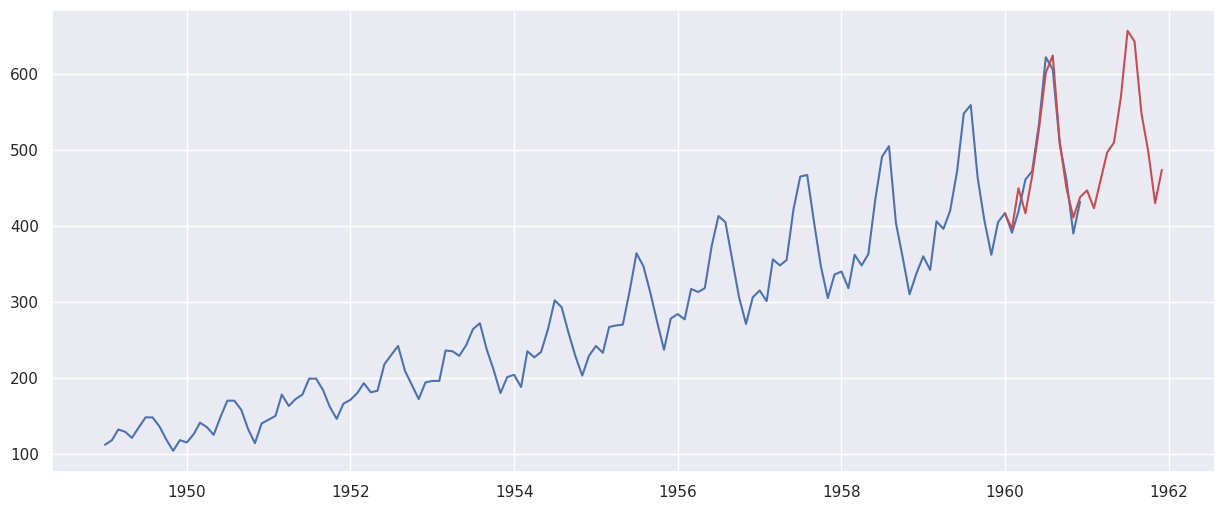

In [74]:
#モデルで予想

pred = SARIMA_3_1_2_111.predict('1960-01-01', '1961-12-01')

plt.plot(ts)
plt.plot(pred, 'r')

# 総当たり法によるSARIMAモデル次数の決定

In [ ]:
#AICが最小となるSARIMAを探す
"""
ARIMA(p, d, q)
季節(sp, sd, sq)

pは自己回帰モデルの次数：AR(p)、
qは移動平均モデルの次数：MA(q)、
dは差分をとる回数：I(d)



"""


In [76]:
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1


pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=['model', 'aic'])
print(pattern)
modelSelection

"""
最大次数3 -> 経験則、これ以上は時間がかかりすぎる
季節性次数　-> 季節系は大きくならないイメージがあるので、小さめに設定

"""

192


,model,aic
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
187,NaN,NaN
188,NaN,NaN
189,NaN,NaN
190,NaN,NaN


In [81]:
# 自動SARIMA選択
import warnings
warnings.filterwarnings('ignore')

num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit(method='bfgs', maxiter=300, disp=False)
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

In [83]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
187,"order=(3,1,3), season=(0,1,1)",898.104538


In [88]:
bestSARIMA = sm.tsa.SARIMAX(ts, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

print(bestSARIMA.summary())


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09073D+00    |proj g|=  3.14232D-02

At iterate    5    f=  3.08145D+00    |proj g|=  6.43062D-02

At iterate   10    f=  3.07703D+00    |proj g|=  1.18568D-02

At iterate   15    f=  3.07614D+00    |proj g|=  9.68955D-03

At iterate   20    f=  3.06953D+00    |proj g|=  6.69828D-02

At iterate   25    f=  3.06355D+00    |proj g|=  3.23278D-02

At iterate   30    f=  3.06329D+00    |proj g|=  3.56360D-03

At iterate   35    f=  3.06286D+00    |proj g|=  1.92750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

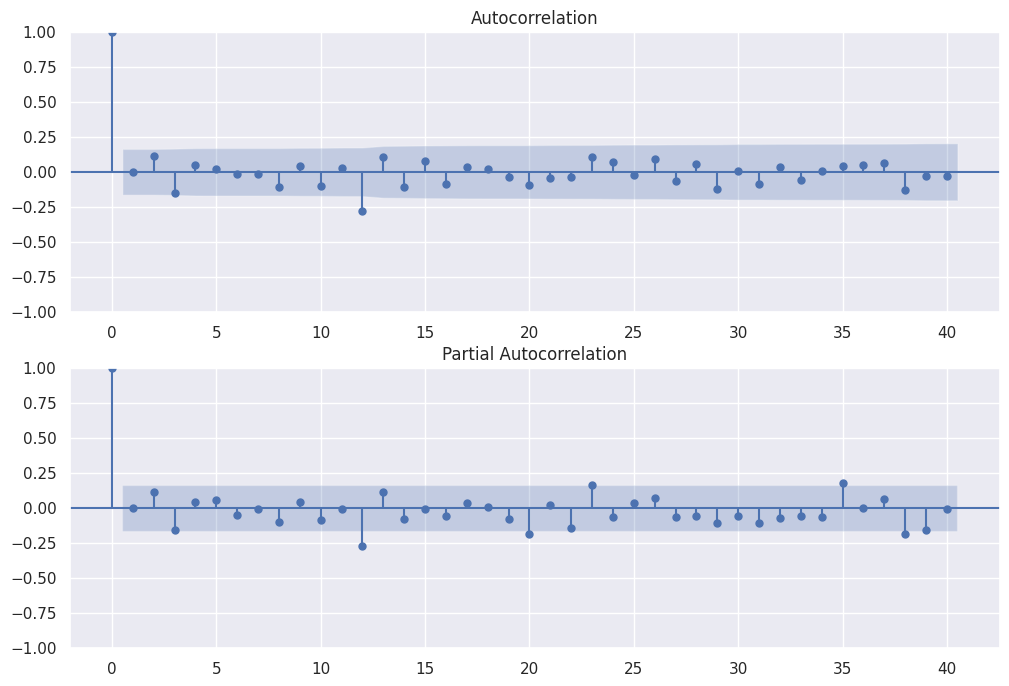

In [89]:
# 残差のチェック
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

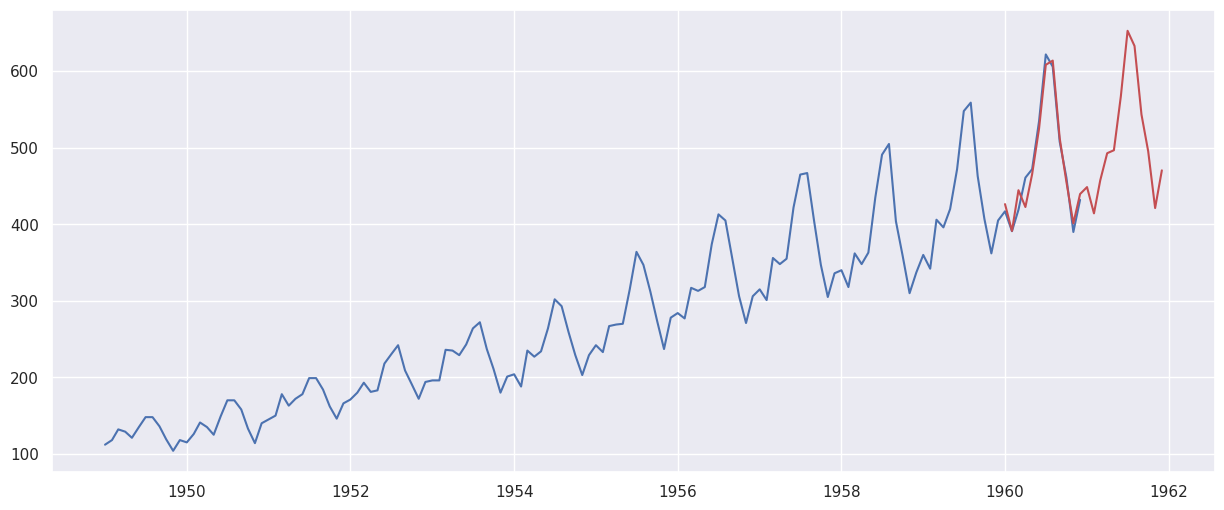

In [92]:
bestPred = bestSARIMA.predict('1960-01-01', '1961-12-01')

plt.plot(ts)
plt.plot(bestPred, 'r')

## ARIMAモデルの推定

In [97]:
# たぶん和分過程なので、差分をとる
diff = ts - ts.shift()
diff = diff.dropna()

# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='n')
resDiff

{'aic':              0            1            2
 0  1413.909117  1397.257792  1397.093436
 1  1401.852641  1394.683204  1385.496795
 2  1396.587654  1378.338025  1353.345800
 3  1395.021214  1379.614000  1377.086541
 4  1388.216680  1384.054248  1373.560615,
 'aic_min_order': (2, 2)}

In [102]:
# p=2, q=2でモデル化

from statsmodels.tsa.arima.model import ARIMA
arima_2_1_2 = ARIMA(ts, order=(2, 1, 2)).fit()
arima_2_1_2.params

ar.L1       1.685024
ar.L2      -0.954852
ma.L1      -1.843205
ma.L2       0.995265
sigma2    665.964602
dtype: float64

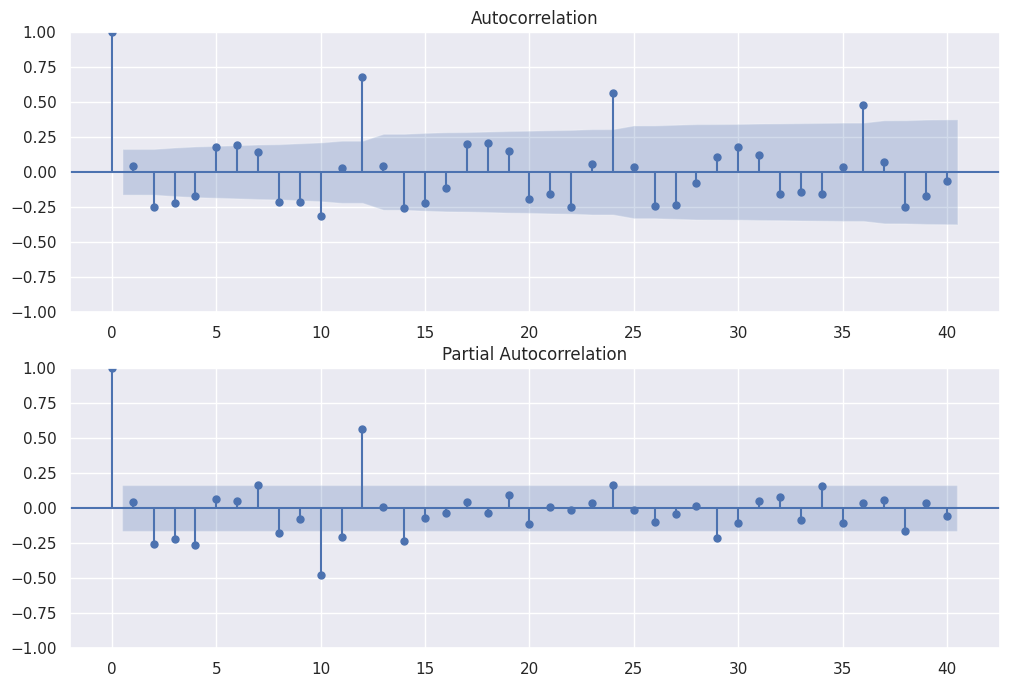

In [103]:
#残差のグラフ

resid = arima_2_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)